In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [4]:
!pip install yfinance 

In [5]:
import yfinance as yf


In [6]:
def get_pair(name):
    curr = yf.Ticker(name)
    hist = curr.history(period = 'max')
    return (hist)

In [7]:
df = get_pair('AUDUSD=X')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2006-05-16,0.7628,0.7690,0.7607,0.7671,0,0,0
2006-05-17,0.7669,0.7726,0.7576,0.7594,0,0,0
2006-05-18,0.7594,0.7676,0.7587,0.7640,0,0,0
2006-05-19,0.7639,0.7648,0.7530,0.7572,0,0,0
2006-05-22,0.7569,0.7569,0.7471,0.7534,0,0,0
...,...,...,...,...,...,...,...
2020-09-10,0.7278,0.7324,0.7263,0.7277,0,0,0
2020-09-11,0.7264,0.7308,0.7260,0.7263,0,0,0
2020-09-14,0.7284,0.7306,0.7265,0.7282,0,0,0


In [8]:
df.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends         int64
Stock Splits      int64
dtype: object

In [9]:
def create_pivot(df):
    pv = pd.pivot_table(df, index = df.index.dayofyear, columns = df.index.year, values = 'Close')
    pv.fillna(method = 'ffill', inplace = True)
    years = [2016,2017,2018,2019]
    pv = pv[years]
    return(pv)

df_seas = create_pivot(df)

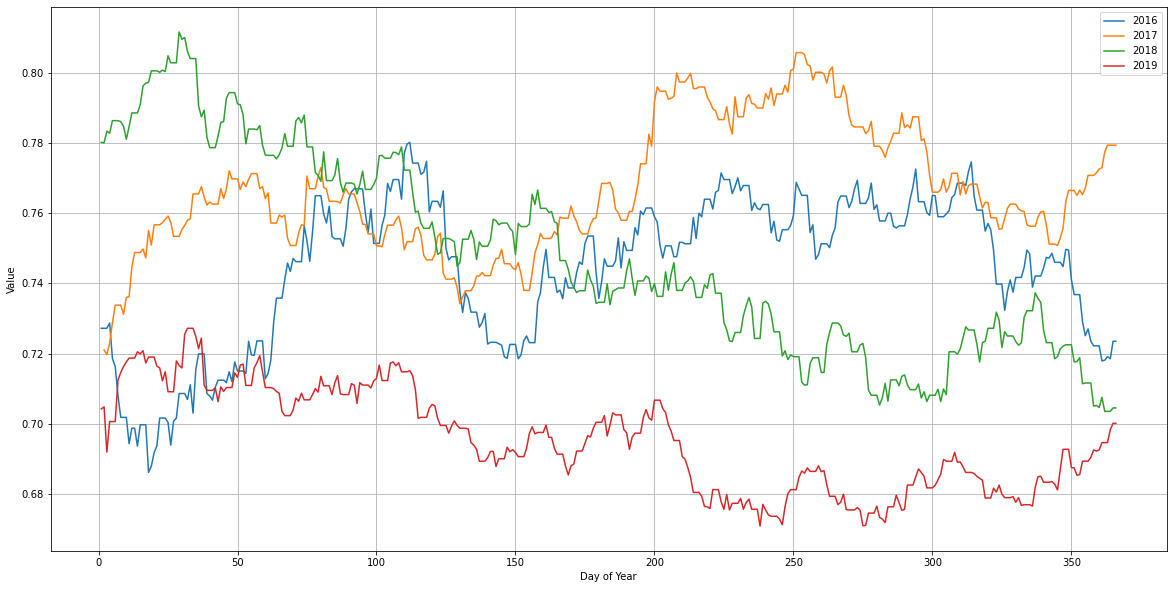

In [13]:
def plotter(df, x, y): 
    plt.figure(figsize = (20,10))
    plt.plot(df[x], df[y])
    plt.grid()
    plt.legend()
    plt.show()
cols = [2016,2017,2018,2019] 

plt.figure(figsize = (20,10))
for i in range(0, len(cols)): 
    df2 = df_seas[cols[i]]#.copy(deep = True)
    df2.dropna(inplace= True)
    plt.plot(df2, label = cols[i])
    
plt.xlabel('Day of Year')
plt.ylabel('Value')
plt.grid()
plt.legend()
plt.show()

In [11]:
df_seas

Date,2016,2017,2018,2019
Date,,,,
1,0.7272,NaN,0.7802,0.7042
2,0.7272,0.7210,0.7801,0.7048
3,0.7272,0.7197,0.7834,0.6919
4,0.7287,0.7230,0.7828,0.7006
5,0.7186,0.7287,0.7864,0.7006
...,...,...,...,...
362,0.7181,0.7775,0.7035,0.6946
363,0.7191,0.7794,0.7035,0.6946
364,0.7185,0.7794,0.7035,0.6983
